In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '数据D.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,address,price,Number of bedrooms,Number of living rooms,area,floor,decoration_label,toward_label
0,1,189.0,4,2,143.00,2,0,1
1,1,62.8,3,2,89.00,0,0,1
2,1,78.0,3,2,88.37,2,0,1
3,1,150.0,4,2,125.00,0,0,1
4,1,75.0,3,2,117.00,1,0,0


In [4]:
# Identify the correct categorical columns for one-hot encoding
# Since 'price' is a numerical column, we can exclude it based on its data type (float64)
categorical_cols = data.select_dtypes(include=['object', 'int64']).columns.tolist()

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the first few rows of the encoded DataFrame
data_encoded.head()



,price,area,address_0,address_1,address_2,address_3,address_4,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3,...,Number of living rooms_3,Number of living rooms_4,Number of living rooms_5,floor_0,floor_1,floor_2,decoration_label_0,decoration_label_1,toward_label_0,toward_label_1
0,189.0,143.00,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,62.8,89.00,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
2,78.0,88.37,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
3,150.0,125.00,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,75.0,117.00,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features from the target variable 'price'
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display the first few rows of the normalized DataFrame
X_normalized_df.head()


,area,address_0,address_1,address_2,address_3,address_4,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3,Number of bedrooms_4,...,Number of living rooms_3,Number of living rooms_4,Number of living rooms_5,floor_0,floor_1,floor_2,decoration_label_0,decoration_label_1,toward_label_0,toward_label_1
0,0.057573,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.033658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.033379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.049601,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.046058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((43793, 29), (10949, 29), (43793,), (10949,))

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the target variable for the test set using the trained KNN model
y_pred = knn.predict(X_test)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_error(y_test, y_pred) / y_test.mean() * 100

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

mape, rmse, mae


(20.550604082097788, 95.13183052724672, 39.99663750114165)

在KNN模型中，通常需要调整以下参数：

n_neighbors：这是KNN中最关键的参数，决定了考虑多少个最近邻来进行预测。这个参数的选取对模型的性能有显著影响。

metric：这个参数决定了计算距离的度量方法。默认情况下，使用欧氏距离（‘euclidean’），但根据数据的特性，可能需要使用其他距离度量，如曼哈顿距离（‘manhattan’）、余弦相似度（‘cosine’）等。

weights：这个参数决定了邻居的权重。默认为’uniform’，即所有邻居对预测的贡献相同。如果设置为’distance’，则邻居的权重与它们到新实例的距离成反比。

leaf_size：这个参数影响了KD树或Ball Tree的构建和查询效率。较大的leaf_size可以提高构建速度，但可能降低查询精度。

p：当metric参数设置为’minkowski’时，这个参数决定了幂次。p=2对应欧氏距离，p=1对应曼哈顿距离。

n_jobs：这个参数决定了在计算最近邻时使用的CPU核心数量。默认为None，使用所有可用核心。设置为-1将使用所有核心。

在实际应用中，最常调整的参数是n_neighbors和metric，因为它们对模型的性能影响最大。weights和leaf_size的调整通常是为了优化模型的效率或适应特定的数据分布。p和n_jobs的调整通常不是必须的，除非有特殊的需求。

调整这些参数时，可以使用交叉验证、网格搜索、随机搜索等方法来找到最优的参数组合。

n_neighbors与MAPE的关系图

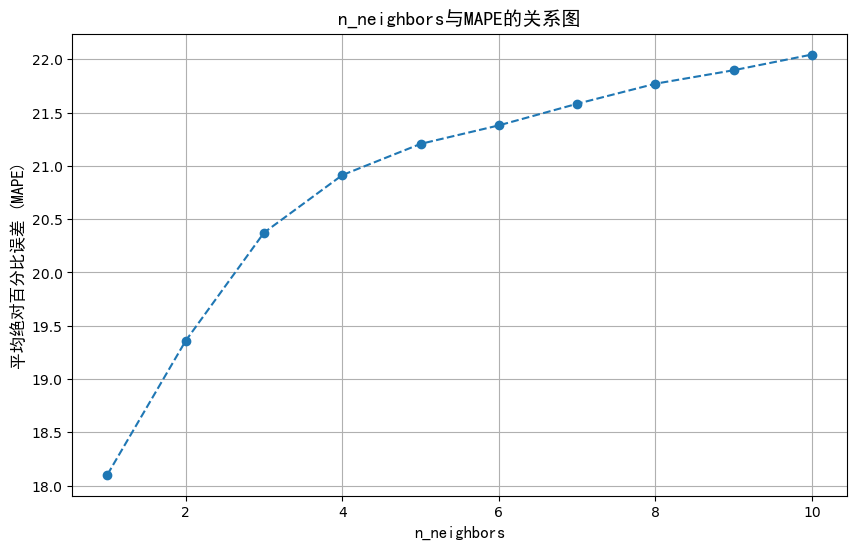

In [27]:
import matplotlib.pyplot as plt

# 假设 X_train, y_train, X_test, y_test 已经从之前的步骤中定义

# 初始化 KNN 回归器，默认邻居数量 (5)
knn = KNeighborsRegressor()

# 创建一个n_neighbors值的列表
n_neighbors_values = list(range(1, 11))

# 创建一个空的MAPE值列表
mape_values = []

# 对每个n_neighbors值进行交叉验证
for n in n_neighbors_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    # 使用交叉验证评估模型性能
    # 这里，我们使用 5 折交叉验证并计算每个折的 MAPE
    mape_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    # 将负 MAPE 分数转换为正数进行计算
    mape_scores = -mape_scores
    # 计算所有折的平均 MAPE
    mean_mape = np.mean(mape_scores)
    # 将平均 MAPE 转换为百分比
    mean_mape_percentage = mean_mape / y_train.mean() * 100
    mape_values.append(mean_mape_percentage)

# 绘制n_neighbors与MAPE的关系图
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mape_values, marker='o', linestyle='--')
plt.title('n_neighbors与MAPE的关系图', fontproperties='SimHei', fontsize=14)
plt.xlabel('n_neighbors', fontproperties='SimHei', fontsize=12)
plt.ylabel('平均绝对百分比误差 (MAPE)', fontproperties='SimHei', fontsize=12)
plt.grid(True)
plt.show()


在给定的n_neighbors值范围内（[1, 4]

In [29]:
# 修正n_neighbors值，确保它们是合法的整数
n_neighbors_values = [1, 2, 3, 4]

# 重新计算不同n_neighbors值下的MAPE值
mape_values = []

for n in n_neighbors_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    # 使用交叉验证评估模型性能
    # 这里，我们使用 5 折交叉验证并计算每个折的 MAPE
    mape_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    # 将负 MAPE 分数转换为正数进行计算
    mape_scores = -mape_scores
    # 计算所有折的平均 MAPE
    mean_mape = np.mean(mape_scores)
    # 将平均 MAPE 转换为百分比
    mean_mape_percentage = mean_mape / y_train.mean() * 100
    mape_values.append(mean_mape_percentage)

# 找到MAPE值最低的n_neighbors
min_mape_index = np.argmin(mape_values)
min_mape_n_neighbors = n_neighbors_values[min_mape_index]
min_mape_n_neighbors, mape_values[min_mape_index]


(1, 18.104052782284104)

欧氏距离（‘euclidean’）、曼哈顿距离（‘manhattan’）、余弦相似度（‘cosine’）、汉明距离（‘hamming’）

In [31]:
# 假设 X_train, y_train, X_test, y_test 已经从之前的步骤中定义

# 初始化 KNN 回归器，默认邻居数量 (5)
knn = KNeighborsRegressor()

# 创建一个距离度量值的列表
distance_metrics = [
    'euclidean',
    'manhattan',
    'cosine',
    'hamming'
]

# 创建一个空的MAPE值列表
mape_values = []

# 对每个距离度量进行交叉验证
for distance in distance_metrics:
    knn = KNeighborsRegressor(metric=distance)
    # 使用交叉验证评估模型性能
    # 这里，我们使用 5 折交叉验证并计算每个折的 MAPE
    mape_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    # 将负 MAPE 分数转换为正数进行计算
    mape_scores = -mape_scores
    # 计算所有折的平均 MAPE
    mean_mape = np.mean(mape_scores)
    # 将平均 MAPE 转换为百分比
    mean_mape_percentage = mean_mape / y_train.mean() * 100
    mape_values.append(mean_mape_percentage)

# 找到MAPE值最低的距离度量
min_mape_index = np.argmin(mape_values)
min_mape_distance_metric = distance_metrics[min_mape_index]
min_mape_distance_metric, mape_values[min_mape_index]


('manhattan', 21.2056871422348)

weights

In [33]:
# 假设 X_train, y_train, X_test, y_test 已经从之前的步骤中定义

# 初始化 KNN 回归器，默认邻居数量 (5)
knn = KNeighborsRegressor()

# 创建一个weights值的列表
weights = ['uniform', 'distance']

# 创建一个空的MAPE值列表
mape_values = []

# 对每个weights值进行交叉验证
for w in weights:
    knn = KNeighborsRegressor(weights=w)
    # 使用交叉验证评估模型性能
    # 这里，我们使用 5 折交叉验证并计算每个折的 MAPE
    mape_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    # 将负 MAPE 分数转换为正数进行计算
    mape_scores = -mape_scores
    # 计算所有折的平均 MAPE
    mean_mape = np.mean(mape_scores)
    # 将平均 MAPE 转换为百分比
    mean_mape_percentage = mean_mape / y_train.mean() * 100
    mape_values.append(mean_mape_percentage)

# 找到MAPE值最低的weights
min_mape_index = np.argmin(mape_values)
min_mape_weights = weights[min_mape_index]
min_mape_weights, mape_values[min_mape_index]


('distance', 15.770961566157984)

leaf_size

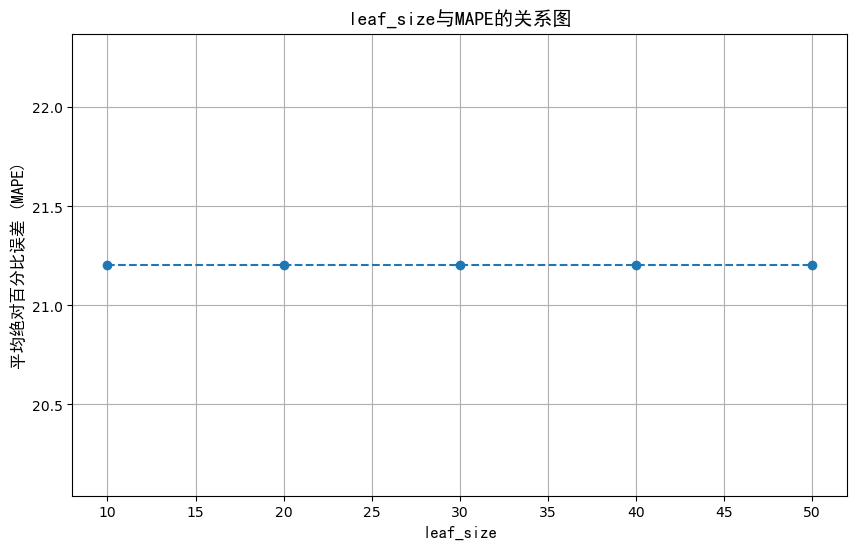

In [35]:
import matplotlib.pyplot as plt

# 假设 X_train, y_train, X_test, y_test 已经从之前的步骤中定义

# 初始化 KNN 回归器，默认邻居数量 (5)
knn = KNeighborsRegressor()

# 创建一个leaf_size值的列表
leaf_sizes = [10, 20, 30, 40, 50]

# 创建一个空的MAPE值列表
mape_values = []

# 对每个leaf_size值进行交叉验证
for l in leaf_sizes:
    knn = KNeighborsRegressor(leaf_size=l)
    # 使用交叉验证评估模型性能
    # 这里，我们使用 5 折交叉验证并计算每个折的 MAPE
    mape_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    # 将负 MAPE 分数转换为正数进行计算
    mape_scores = -mape_scores
    # 计算所有折的平均 MAPE
    mean_mape = np.mean(mape_scores)
    # 将平均 MAPE 转换为百分比
    mean_mape_percentage = mean_mape / y_train.mean() * 100
    mape_values.append(mean_mape_percentage)

# 绘制leaf_size与MAPE值的关系图
plt.figure(figsize=(10, 6))
plt.plot(leaf_sizes, mape_values, marker='o', linestyle='--')
plt.title('leaf_size与MAPE的关系图', fontproperties='SimHei', fontsize=14)
plt.xlabel('leaf_size', fontproperties='SimHei', fontsize=12)
plt.ylabel('平均绝对百分比误差 (MAPE)', fontproperties='SimHei', fontsize=12)
plt.grid(True)
plt.show()


In [34]:
# 假设 X_train, y_train, X_test, y_test 已经从之前的步骤中定义

# 初始化 KNN 回归器，默认邻居数量 (5)
knn = KNeighborsRegressor()

# 创建一个leaf_size值的列表
leaf_sizes = [10, 20, 30, 40, 50]

# 创建一个空的MAPE值列表
mape_values = []

# 对每个leaf_size值进行交叉验证
for l in leaf_sizes:
    knn = KNeighborsRegressor(leaf_size=l)
    # 使用交叉验证评估模型性能
    # 这里，我们使用 5 折交叉验证并计算每个折的 MAPE
    mape_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    # 将负 MAPE 分数转换为正数进行计算
    mape_scores = -mape_scores
    # 计算所有折的平均 MAPE
    mean_mape = np.mean(mape_scores)
    # 将平均 MAPE 转换为百分比
    mean_mape_percentage = mean_mape / y_train.mean() * 100
    mape_values.append(mean_mape_percentage)

# 找到MAPE值最低的leaf_size
min_mape_index = np.argmin(mape_values)
min_mape_leaf_size = leaf_sizes[min_mape_index]
min_mape_leaf_size, mape_values[min_mape_index]


(10, 21.20649300871964)

leaf_size=10,weights=distance,manhattan,n_neighbors=1

In [37]:
# 假设 X_train, y_train, X_test, y_test 已经从之前的步骤中定义

# 初始化 KNN 回归器，指定参数
knn = KNeighborsRegressor(leaf_size=10, weights='distance', metric='manhattan', n_neighbors=1)

# 在训练数据上拟合 KNN 模型
knn.fit(X_train, y_train)

# 对测试集进行预测
y_pred = knn.predict(X_test)

# 计算 MAPE (平均绝对百分比误差)
mape = mean_absolute_error(y_test, y_pred) / y_test.mean() * 100

# 计算 MAE (平均绝对误差)
mae = mean_absolute_error(y_test, y_pred)

# 计算 RMSE (均方根误差)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mape, mae, rmse


(17.42046161730971, 33.90459402685177, 102.95878456125267)

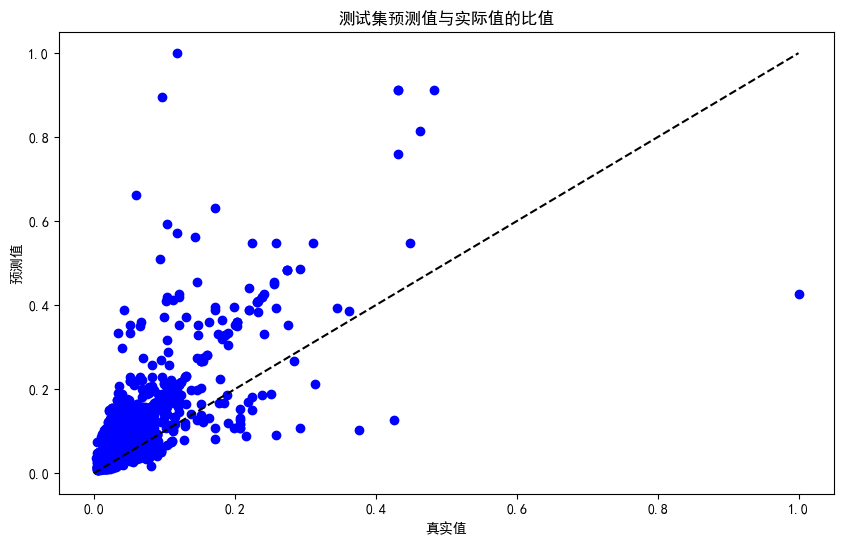

In [46]:
import matplotlib.pyplot as plt
import matplotlib

# 安装支持中文的字体（例如，思源黑体）
# 您可以从 https://github.com/adobe-fonts/source-han-sans 下载字体文件，并按照指示进行安装

# 设置Matplotlib以使用支持中文的字体
matplotlib.rcParams['font.family'] = ['SimHei']  # 这里替换为您的字体名称
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 假设 X_train, y_train, X_test, y_test 已经从之前的步骤中定义

# 初始化 KNN 回归器，指定参数
knn = KNeighborsRegressor(leaf_size=10, weights='distance', metric='manhattan', n_neighbors=1)

# 在训练数据上拟合 KNN 模型
knn.fit(X_train, y_train)

# 对测试集进行预测
y_pred = knn.predict(X_test)

# 绘制测试集预测值与实际值的比值
plt.figure(figsize=(10, 6))
plt.scatter(y_test / y_test.max(), y_pred / y_pred.max(), color='blue')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # 添加y=x的辅助线
plt.title('测试集预测值与实际值的比值')
plt.xlabel('真实值')
plt.ylabel('预测值')


plt.show()
